[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



A) eye color B) height C) number rolled on die D) time taken to run 100 meters

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

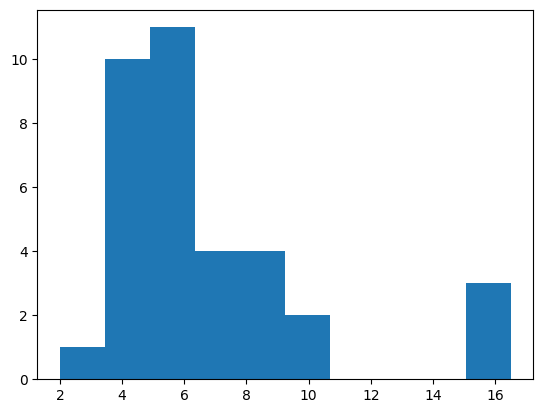

In [2]:
plt.hist(carbon_west['CO2'])
plt.show()

Part b. Find the mean, median, and standard deviation.

In [3]:
mean_value = carbon_west['CO2'].mean()
median_value = carbon_west['CO2'].median()
std_deviation = carbon_west['CO2'].std()


# Display the results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")


Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3569493954627134


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [4]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [5]:

murders_no_dc = murders[murders['state'] != 'DC']

mean_murders = murders_no_dc['murder'].mean()
std_dev_murders = murders_no_dc['murder'].std()

print(f"Mean (excluding D.C.): {mean_murders}")
print(f"Standard Deviation (excluding D.C.): {std_dev_murders}")


Mean (excluding D.C.): 4.874
Standard Deviation (excluding D.C.): 2.586291174793806


Part b. Find the five-number  summary without D.C.

In [6]:
min_murders = murders_no_dc['murder'].min()
q1_murders = murders_no_dc['murder'].quantile(0.25)
median_murders = murders_no_dc['murder'].median()
q3_murders = murders_no_dc['murder'].quantile(0.75)
max_murders = murders_no_dc['murder'].max()

# Display the five-number summary
print(f"Minimum: {min_murders}")
print(f"Q1: {q1_murders}")
print(f"Median: {median_murders}")
print(f"Q3: {q3_murders}")
print(f"Maximum: {max_murders}")


Minimum: 1.0
Q1: 2.625
Median: 4.85
Q3: 6.175
Maximum: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [7]:
mean_murders = murders['murder'].mean()
std_dev_murders = murders['murder'].std()

min_murders = murders['murder'].min()
q1_murders = murders['murder'].quantile(0.25)
median_murders = murders['murder'].median()
q3_murders = murders['murder'].quantile(0.75)
max_murders = murders['murder'].max()

# Display the five-number summary
print(f"Minimum: {min_murders}")
print(f"Q1: {q1_murders}")
print(f"Median: {median_murders}")
print(f"Q3: {q3_murders}")
print(f"Maximum: {max_murders}")
print(f"Mean: {mean_murders}")
print(f"Standard Deviation: {std_dev_murders}")

print("The mean and overall range for this data set when including DC is changed more significantly than the median and interquartile range")

Minimum: 1.0
Q1: 2.6500000000000004
Median: 5.0
Q3: 6.45
Maximum: 24.2
Mean: 5.252941176470588
Standard Deviation: 3.7253914125190373
The mean and overall range for this data set when including DC is changed more significantly than the median and interquartile range


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [8]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home.

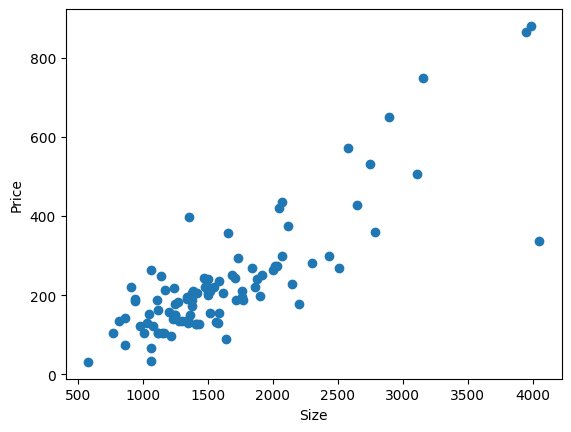

In [9]:
plt.scatter(houses['size'], houses['price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

Part b. Find the correlation between the two variables.

In [10]:
correlation = houses['size'].corr(houses['price'])
print(f"Correlation between size and price: {correlation}")


Correlation between size and price: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

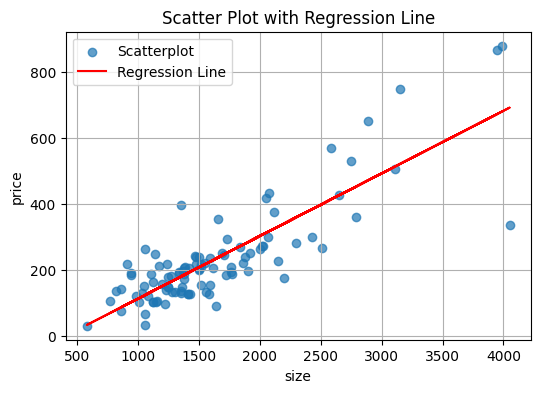

In [11]:
from sklearn.linear_model import LinearRegression

x = houses[['size']]
y = houses['price']

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Retrieve the coefficient (slope) and intercept of the linear regression
slope = model.coef_[0]
intercept = model.intercept_

# Plot the scatterplot
plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7, label='Scatterplot')

# Plot the regression line
plt.plot(x, model.predict(x), color='red', label='Regression Line')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('size')
plt.ylabel('price')
plt.legend()
plt.grid(True)
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

<Figure size 800x600 with 0 Axes>

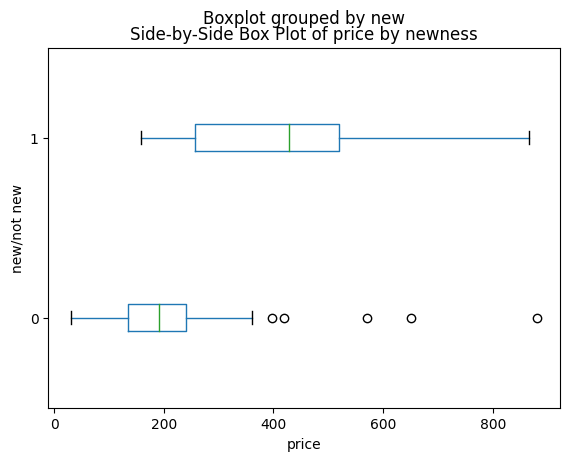

In [17]:
plt.figure(figsize=(8, 6))
houses.boxplot(column='price', by='new', vert=False,grid = False)
plt.title('Side-by-Side Box Plot of price by newness')
plt.xlabel('price')
plt.ylabel('new/not new')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

The relationship between size and price is closely tied and linear. We can tell this because the linear regression value is .83.

Additionally, we can tell that the relationship between wheter or not a house is new also has some significant impact on the price of a house. We can see this in the above graph where the 5 number summary, range, and mean are all higher for new houses.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [18]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")

In [24]:
pd.crosstab(happy['marital'], happy['happiness'])



happiness,1,1 1,1 2,1 3,2,2 1,2 2,2 3,3,3 1,3 2,3 3
marital,,,,,,,,,,,,
fe,348,0,0,0,642,0,0,0,153,0,0,0
fem,0,5,0,0,0,0,0,0,0,0,0,0
mal,0,107,33,56,0,229,114,210,0,33,45,68
male,0,99,0,0,0,0,0,0,0,0,0,0
